# Regression Predict Khensani Dlamini
© Explore Data Science Academy


Data is a critical component in helping Sendy to build more efficient, affordable and accessible solutions. Given the details of a Sendy order, can we use historic data to predict an accurate time for the arrival of the rider at the destination of a package? In this competition, we’re challenging you to build a model that predicts an accurate delivery time, from picking up a package to arriving at the final destination. An accurate arrival time prediction will help all businesses to improve their logistics and communicate an accurate time to their customers.

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

### Data Review

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
riders = pd.read_csv('Riders.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')
variable_definitions = pd.read_csv('VariableDefinitions.csv')

In [3]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [5]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [6]:
sample_submission.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [7]:
variable_definitions.head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


### Visualizations

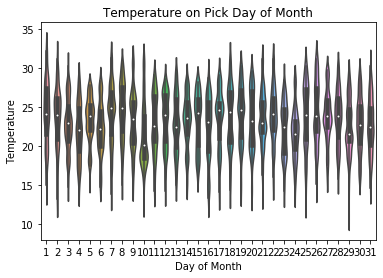

In [8]:
_ = sns.violinplot(x = 'Placement - Day of Month', y= 'Temperature', data=train)
# plt.scatter(train['Pickup - Day of Month'], train['Temperature'])
plt.title('Temperature on Pick Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Temperature')
plt.show()

### Rider Average Rating

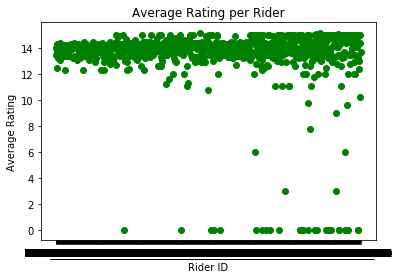

In [9]:
plt.scatter(riders['Rider Id'], riders['Average_Rating'], color='green')
plt.title('Average Rating per Rider')
plt.xlabel('Rider ID')
plt.ylabel('Average Rating')
plt.show()

### Merging Dataset

In [10]:
train = train[['Order No', 'User Id', 'Vehicle Type', 'Platform Type', 'Personal or Business',
              'Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Placement - Time',
              'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
              'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)',
              'Arrival at Pickup - Time', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
              'Pickup - Time', 'Distance (KM)' , 'Temperature', 'Precipitation in millimeters',
              'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long', 'Rider Id', 'Time from Pickup to Arrival']]

In [11]:
df = pd.concat([train, test], sort=False)
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:27:30 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,11:44:09 AM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,12:53:03 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9:43:06 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:05:23 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0


In [12]:
df = df.drop(['Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',], axis = 1)

In [13]:
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0
2,Order_No_1899,User_Id_265,Bike,3,Business,12:39:25 PM,12:42:44 PM,12:49:34 PM,12:53:03 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0
3,Order_No_9336,User_Id_1402,Bike,3,Business,9:25:34 AM,9:26:05 AM,9:37:56 AM,9:43:06 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,9:55:18 AM,9:56:18 AM,10:03:53 AM,10:05:23 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0


In [14]:
df_final = df.drop(['Order No', 'User Id', 'Vehicle Type', 'Rider Id', 'Placement - Time','Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time'], axis =1)
df_final.head()

,Platform Type,Personal or Business,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,3,Business,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,745.0
1,3,Personal,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,1993.0
2,3,Business,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,455.0
3,3,Business,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,1341.0
4,1,Personal,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,1214.0


### Categorical Data Encoding and Data Cleaning

In [15]:
df_final = pd.get_dummies(df_final)
df_final = df_final.fillna(np.round(df_final.mean(), 2))
df_final.head()

,Platform Type,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,Personal or Business_Business,Personal or Business_Personal
0,3,4,20.40,7.57,-1.317755,36.830370,-1.300406,36.829741,745.0,1,0
1,3,16,26.40,7.57,-1.351453,36.899315,-1.295004,36.814358,1993.0,0,1
2,3,3,23.26,7.57,-1.308284,36.843419,-1.300921,36.828195,455.0,1,0
3,3,9,19.20,7.57,-1.281301,36.832396,-1.257147,36.795063,1341.0,1,0
4,1,9,15.40,7.57,-1.266597,36.792118,-1.295041,36.809817,1214.0,0,1


### Train Test Split

In [17]:
y = df_final[:len(train)][['Time from Pickup to Arrival']]
x_train = df_final[:len(train)].drop('Time from Pickup to Arrival', axis=1)
x_test = df_final[len(train):].drop('Time from Pickup to Arrival', axis=1)
x = df_final[:len(train)].drop('Time from Pickup to Arrival', axis=1)

# create standardization object
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 1)
(X_train, y_train), (X_test, y_test)

((array([[ 3.96406199e-01, -2.65757300e-01, -2.15992223e+00, ...,
          -4.07300177e-01,  4.68582671e-01, -4.68582671e-01],
         [ 3.96406199e-01, -9.71370390e-01,  6.02397355e-01, ...,
           1.26275859e-01,  4.68582671e-01, -4.68582671e-01],
         [ 3.96406199e-01,  2.63452517e-01,  2.73759486e-04, ...,
           4.21466420e-01,  4.68582671e-01, -4.68582671e-01],
         ...,
         [ 3.96406199e-01, -9.71370390e-01, -1.01154218e+00, ...,
           4.14158661e-01,  4.68582671e-01, -4.68582671e-01],
         [ 3.96406199e-01,  9.69065607e-01, -4.21833503e-01, ...,
          -1.05098407e-02,  4.68582671e-01, -4.68582671e-01],
         [ 3.96406199e-01,  1.85108197e+00, -1.38398976e+00, ...,
           2.98556657e+00,  4.68582671e-01, -4.68582671e-01]]),
         Time from Pickup to Arrival
  15274                       1013.0
  21050                        707.0
  17471                       2121.0
  10853                       1038.0
  3675                        3

### Train Model

In [18]:
#Using LASSO Regression
lm = Lasso(alpha=0.09)
lm.fit(X_train, y_train)

Lasso(alpha=0.09, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## Predicting the Test set results

In [19]:
y_pred = lm.predict(X_test)


In [20]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [21]:
rmse(y_test, y_pred)

792.6665642039305

In [22]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.34081698044035746

### Submission

In [23]:
x_train = df_final[:len(train)].drop('Time from Pickup to Arrival', axis=1)
x_test = df_final[len(train):].drop('Time from Pickup to Arrival', axis=1)

In [24]:
lm.fit(x_train, y)
preds = lm.predict(x_test)

In [25]:
preds

array([1319.33270097, 1104.84702396, 1064.4579423 , ..., 1638.57393579,
       2631.50683772, 1437.88963129])

In [26]:
daf = pd.DataFrame(preds, columns=['Time from Pickup to Arrival'])
orderno = pd.DataFrame({"Order No":test['Order No']})
submission = orderno.join(daf)
submission.to_csv("submission.csv", index=False)

In [27]:
submission.head()

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1319.332701
1,Order_No_12736,1104.847024
2,Order_No_768,1064.457942
3,Order_No_15332,1098.286969
4,Order_No_21373,1185.447662


## Conclusion

- Implemented a linear model using lasso regularization;
- Prediction has rmse of 792.67